In [115]:
import wfdb
import matplotlib.pyplot as plt
from biosppy.signals import ecg
import pandas as pd
import numpy as np
from scipy.fft import fft
import scipy
import numpy as np
from scipy.stats import skew,kurtosis
from collections.abc import MutableMapping
import collections

from collections import abc
collections.MutableMapping = abc.MutableMapping
import hrv
from hrv.rri import RRi
from hrv.classical import time_domain
from hrv.classical import frequency_domain

In [68]:
# Carregando os dados do arquivo CSV (substitua 'seu_arquivo.csv' pelo caminho do seu arquivo)
caminho_arquivo = 'dataset/mk11_teste_ECG_04.csv'
dados = pd.read_csv(caminho_arquivo,sep=',',on_bad_lines='skip')

# Mostrar os dados originais
print("Dados Originais:")
print(dados)

Dados Originais:
      Heart_rate   hrv   ecg
0            0.0  0.00     0
1            0.0  0.00     0
2            0.0  0.00     0
3            0.0  0.00     0
4            0.0  0.00     0
...          ...   ...   ...
8076        72.0  1.14  -166
8077         0.0  0.00     0
8078        72.0  1.14  -166
8079        72.0  1.14  -166
8080        72.0  1.14  -166

[8081 rows x 3 columns]


In [69]:
# Eliminar ruídos ou valores inconsistentes (por exemplo, valores acima de um limite)
ruido = 0  # Defina seu limite para eliminar ruídos

# Substituir os valores que estão dentro do limite por NaN (valores ausentes)
dados_limpos = dados.mask(dados == ruido)

# Remover linhas que contenham valores ausentes (NaN)
dados_limpos = dados_limpos.dropna()

# Mostrar os dados após a limpeza
print("\nDados Após a Limpeza:")
print(dados_limpos)


Dados Após a Limpeza:
      Heart_rate   hrv    ecg
5           72.0  1.20 -166.0
6           72.0  1.20 -166.0
7           72.0  1.20 -166.0
8           72.0  1.20 -166.0
9           72.0  1.20 -166.0
...          ...   ...    ...
8075        72.0  1.14 -166.0
8076        72.0  1.14 -166.0
8078        72.0  1.14 -166.0
8079        72.0  1.14 -166.0
8080        72.0  1.14 -166.0

[6456 rows x 3 columns]


In [72]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6456 entries, 5 to 8080
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Heart_rate  6456 non-null   float64
 1   hrv         6456 non-null   float64
 2   ecg         6456 non-null   float64
dtypes: float64(3)
memory usage: 201.8 KB


In [71]:
dados_limpos = dados_limpos.rename(columns={' ecg': 'ecg', ' hrv': 'hrv'})


In [73]:
# Processamento do sinal ECG
ecg_data = dados_limpos['ecg']
out = ecg.ecg(signal=ecg_data, sampling_rate=1200, show=False)

# Picos R detectados
picos_r = out['rpeaks']

# Calcular intervalos entre batimentos cardíacos
intervalos_batimentos = np.diff(picos_r)

# Calcular BPM
bpm = 60 / np.mean(intervalos_batimentos)

print("BPM:", bpm)

# Calcular HRV (desvio padrão dos intervalos RR)
hrv = np.std(intervalos_batimentos)

print("HRV:", hrv)


media_ecg = np.mean(ecg_data)
desvio_padrao_ecg = np.std(ecg_data)
assimetria_ecg = scipy.stats.skew(ecg_data)
curtose_ecg = scipy.stats.kurtosis(ecg_data)

print("Média do ECG:", media_ecg)
print("Desvio Padrão do ECG:", desvio_padrao_ecg)
print("Assimetria do ECG:", assimetria_ecg)
print("Curtose do ECG:", curtose_ecg)

BPM: 0.11261730969760166
HRV: 224.33891908735754
Média do ECG: -153.13863073110284
Desvio Padrão do ECG: 51.08381255775939
Assimetria do ECG: 5.41085313352158
Curtose do ECG: 33.812164121370095


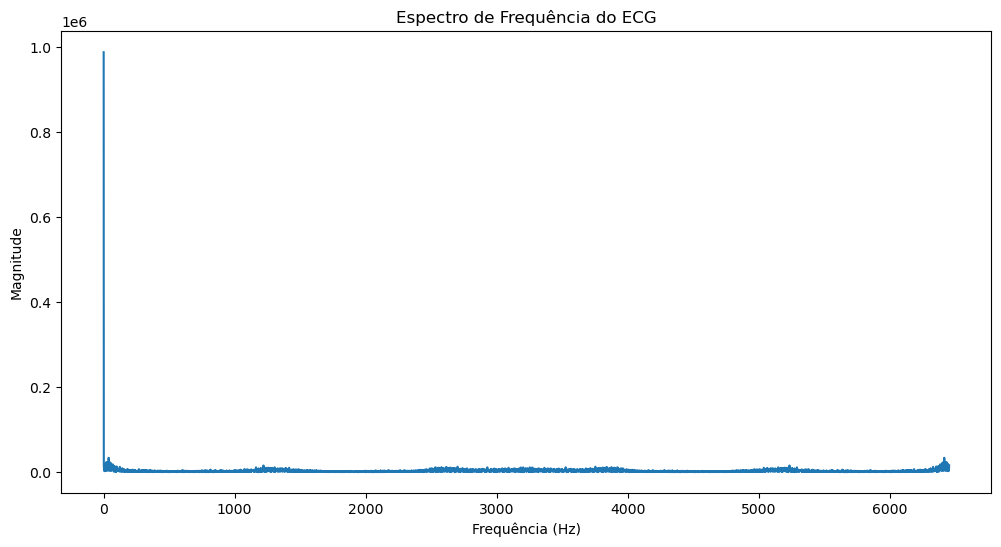

In [79]:
# Calcular a transformada de Fourier
fft_result = np.fft.fft(ecg_data)
plt.figure(figsize=(12, 6))

# Plotar o espectro de frequência
plt.plot(np.abs(fft_result))
plt.title('Espectro de Frequência do ECG')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.show()

In [75]:
# Obter valores do sinal de ECG da coluna adequada do CSV
sinal_ecg = ecg_data# Substitua 'Nome_da_Coluna_do_ECG' pelo nome da coluna no arquivo CSV

# Processamento do sinal de ECG para extrair características (features)
out = ecg.ecg(signal=sinal_ecg, sampling_rate=1200, show=False)  
# Imprimindo algumas das características extraídas
print("R Peaks (Batimentos cardíacos identificados):", out['heart_rate'])
print("Frequência cardíaca média:", out['heart_rate'].mean())
print("Duração do intervalo RR:", out['heart_rate_ts'])

R Peaks (Batimentos cardíacos identificados): [120.91539631 114.50151214 124.8683383  104.85821413 109.37939975
  97.11987504]
Frequência cardíaca média: 111.94045594428195
Duração do intervalo RR: [0.85416667 1.24833333 1.94583333 2.81666667 3.4675     4.07      ]


Frequência Cardíaca (BPM): [ 73.97504456  61.65729695  46.84407239  70.90824351  82.79973367
  92.01071733 115.29503106 141.86507937 159.72222222 114.17137476
  72.12933272  64.94542468  86.4578106  105.73118233 130.07195312
 120.5959219  108.21719992 111.89367051 111.89367051 120.47101449
  95.70686355  98.97942082  91.73304401 108.051249   108.58006973
 113.15672877 114.65823028 140.69487444 173.20261438 132.9142344
 125.37275627  89.27649958 108.49208263  86.19553859  95.21429761
  82.00813474  88.11034679 101.8188605  125.99681021]


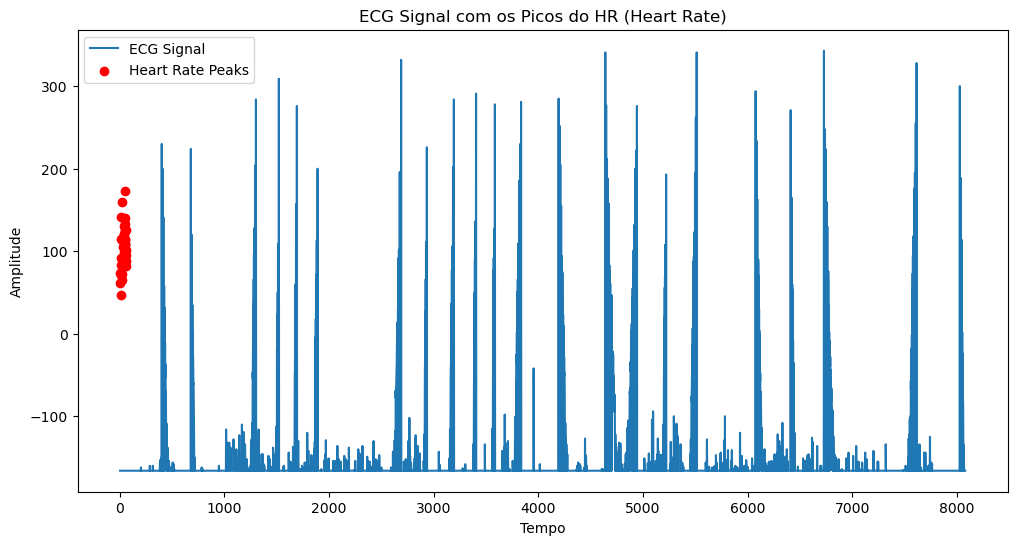

In [137]:


# Processamento do sinal ECG
out = ecg.ecg(signal=ecg_data, sampling_rate=1200, show=False)

# Frequência cardíaca em BPM
heart_rate = out['heart_rate']
print("Frequência Cardíaca (BPM):", heart_rate)

# Plotar o sinal ECG e os picos detectados
plt.figure(figsize=(12, 6))
plt.plot(ecg_data, label='ECG Signal')
plt.scatter(out['heart_rate_ts'], out['heart_rate'], color='red', label='Heart Rate Peaks')
plt.title('ECG Signal com os Picos do HR (Heart Rate)')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [142]:
out = ecg.ecg(signal=ecg_data, sampling_rate=100, show=False)

# Extract specific features from the processed ECG signal
rr_intervals = out['rpeaks']  # R-peak indices
rr_intervals
rri = RRi(rr_intervals)

desc = rri.describe()
desc

----------------------------------------
                   rri          hr
----------------------------------------
min             160.00        9.70
max            6187.00      375.00
mean           3497.78       36.80
var         3078578.81     3933.82
std            1754.59       62.72
median         4004.00       14.99
amplitude      6027.00      365.30

In [143]:
rri.info()


N Points: 63
Duration: 220.20s
Interpolated: False
Detrended: False
Memory Usage: 0.49Kb

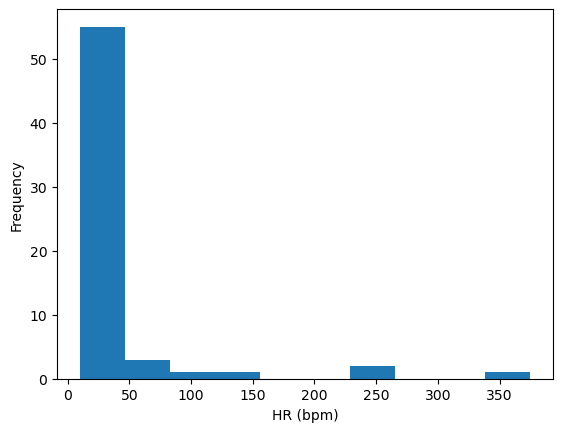

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='HR (bpm)', ylabel='Frequency'>)

In [144]:
rri.hist(hr=True)

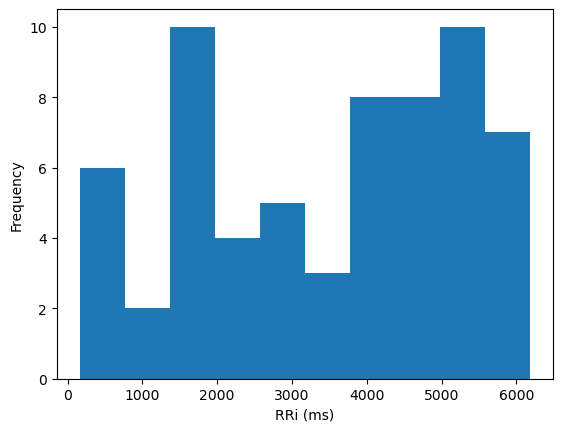

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='RRi (ms)', ylabel='Frequency'>)

In [145]:
rri.hist()

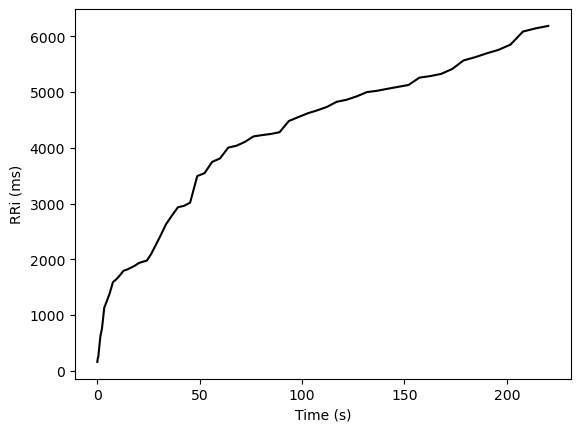

In [146]:
fig, ax = rri.plot(color='k')

In [147]:
results = time_domain(rri)
print(results)

{'rmssd': 129.12853061719102, 'sdnn': 1768.6812331959363, 'sdsd': 85.69066309043153, 'nn50': 42, 'pnn50': 66.66666666666666, 'mrri': 3497.777777777778, 'mhr': 36.79630142232384}


In [148]:
results = frequency_domain(
    rri=rri,
    fs=4.0,
    method='welch',
    interp_method='cubic',
    detrend='linear'
)
print(results)

{'total_power': 6425.459947132599, 'vlf': 5094.275859564772, 'lf': 1318.7519718762119, 'hf': 12.432115691615, 'lf_hf': 106.07623067453122, 'lfnu': 99.06608591495939, 'hfnu': 0.9339140850405899}


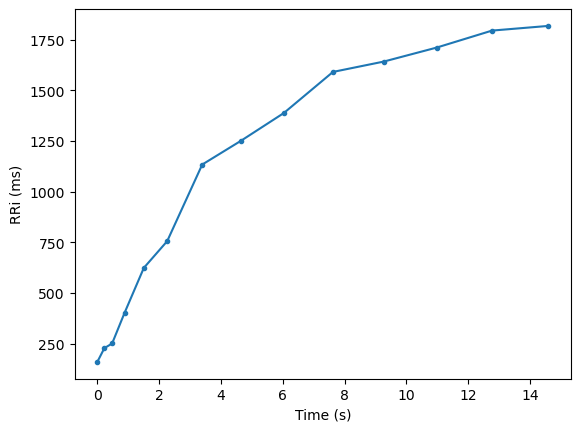

In [149]:
rri_range = rri.time_range(start=0, end=15)

fig, ax = rri_range.plot(marker='.')

In [120]:
results = frequency_domain(
    rri=rri_range,
    fs=4.0,
    method='welch',
    interp_method='cubic',
    detrend='linear'
)
print(results)

{'total_power': 20068.12186579893, 'vlf': 0.0, 'lf': 19219.82279785916, 'hf': 848.2990679397683, 'lf_hf': 22.65689486673328, 'lfnu': 95.77290254856644, 'hfnu': 4.227097451433564}


/home/eltonss/anaconda3/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 56, using nperseg = 56
  warnings.warn('nperseg = {0:d} is greater than input length '
